<a href="https://colab.research.google.com/github/MohammadHeydari/Glove_Python/blob/master/GloVe_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install glove_python

In [26]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [5]:
from google.colab import files 
file = files.upload()

Saving glove.6B.50d.txt to glove.6B.50d.txt


In [29]:
embeddings_dict = {}
with open("glove.6B.50d.txt", 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        token = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[token] = vector

In [30]:
def find_closest_embeddings(embedding, cutoff=25):
    return sorted(embeddings_dict.keys(), key=lambda token: spatial.distance.euclidean(embeddings_dict[token], embedding))

In [70]:
print(find_closest_embeddings(
    embeddings_dict["iran"] + embeddings_dict["nations"])[:5])

['iran', 'nations', 'countries', 'iraq', 'sanctions']


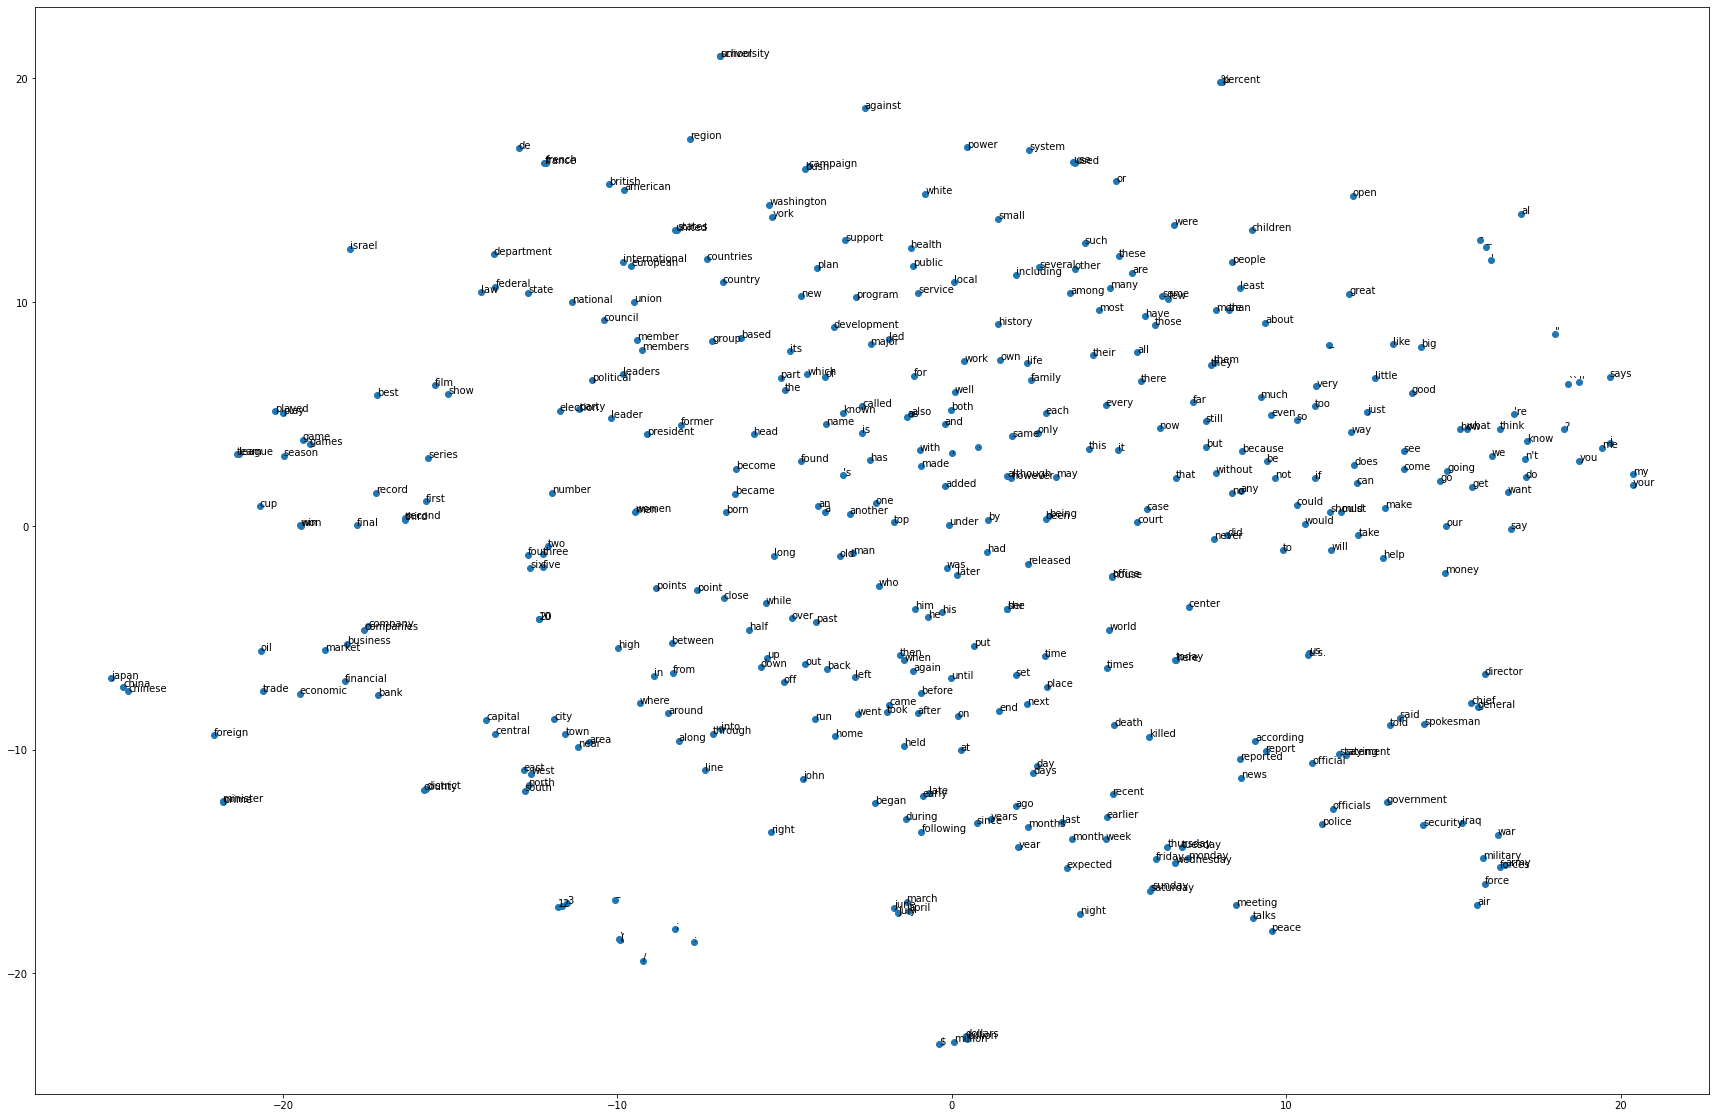

In [77]:
tsne = TSNE(n_components=2, random_state=0)
tokens = list(embeddings_dict.keys())
vectors = [embeddings_dict[token] for token in tokens]
Y = tsne.fit_transform(vectors[:400])

plt.figure(figsize=(30,20)) 
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(tokens, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()